Dataset: Diabetes Risk Prediction:
https://www.kaggle.com/datasets/rcratos/diabetes-risk-prediction

Target: Finding out how likely It is/the risk someone will get diabetes based on different factors.

In [29]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. Exploring the dataset

In [30]:
# load in the data

rawDF = pd.read_csv("diabetes_risk_prediction_dataset.csv")

rawDF.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [31]:
rawDF.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [32]:
rawDF["class"].value_counts()

class
Positive    320
Negative    200
Name: count, dtype: int64

2. Handling Missing Values (if applicable)

In [33]:
rawDF.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

None. (phew)

Making visualizations of the distribution of each column.

Age:

<Axes: xlabel='Age', ylabel='Count'>

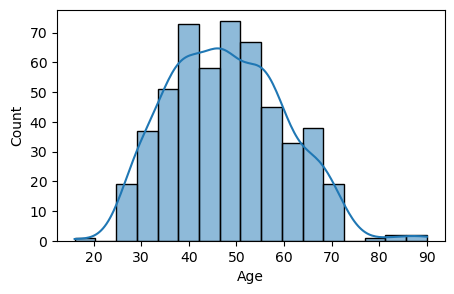

In [34]:
plt.figure(figsize=(5,3))
sns.histplot(rawDF['Age'], kde=True)


Gender

<Axes: xlabel='Gender', ylabel='count'>

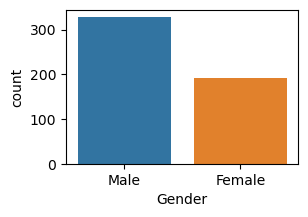

In [35]:
plt.figure(figsize=(3,2))
sns.countplot(x='Gender', data=rawDF)

Polyuria (Excessive Urination)

<Axes: xlabel='Polyuria', ylabel='count'>

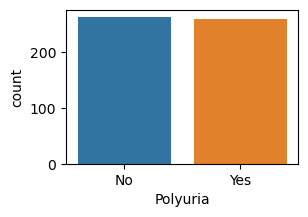

In [36]:
plt.figure(figsize=(3,2))
sns.countplot(x='Polyuria', data=rawDF)

Polydipsia (Excessive Thirst)

<Axes: xlabel='Polydipsia', ylabel='count'>

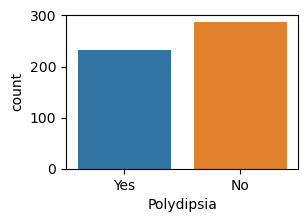

In [37]:
plt.figure(figsize=(3,2))
sns.countplot(x='Polydipsia', data=rawDF)

sudden weight loss

<Axes: xlabel='sudden weight loss', ylabel='count'>

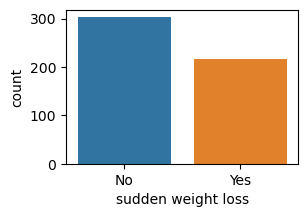

In [38]:
plt.figure(figsize=(3,2))
sns.countplot(x='sudden weight loss', data=rawDF)

weakness (general)

<Axes: xlabel='weakness', ylabel='count'>

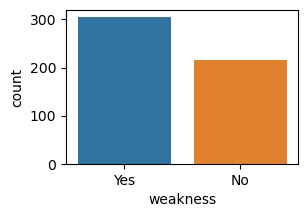

In [39]:
plt.figure(figsize=(3,2))
sns.countplot(x='weakness', data=rawDF)

Polyphagia (excessive hunger)

<Axes: xlabel='Polyphagia', ylabel='count'>

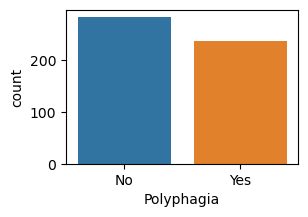

In [40]:
plt.figure(figsize=(3,2))
sns.countplot(x='Polyphagia', data=rawDF)

Genital Thrush (yeast infection)

<Axes: xlabel='Genital thrush', ylabel='count'>

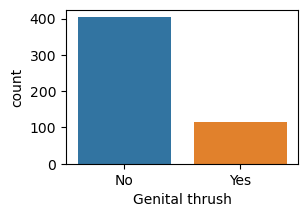

In [41]:
plt.figure(figsize=(3,2))
sns.countplot(x='Genital thrush', data=rawDF)

visual blurring

<Axes: xlabel='visual blurring', ylabel='count'>

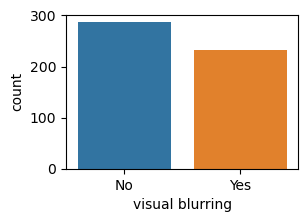

In [42]:
plt.figure(figsize=(3,2))
sns.countplot(x='visual blurring', data=rawDF)

Itching

<Axes: xlabel='Itching', ylabel='count'>

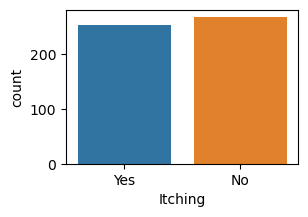

In [43]:
plt.figure(figsize=(3,2))
sns.countplot(x='Itching', data=rawDF)

Irritability

<Axes: xlabel='Irritability', ylabel='count'>

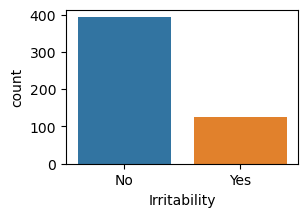

In [44]:
plt.figure(figsize=(3,2))
sns.countplot(x='Irritability', data=rawDF)

delayed healing

<Axes: xlabel='delayed healing', ylabel='count'>

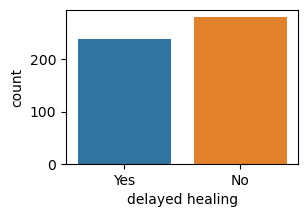

In [45]:
plt.figure(figsize=(3,2))
sns.countplot(x='delayed healing', data=rawDF)

partial paresis (partial paralysis of both legs)

<Axes: xlabel='partial paresis', ylabel='count'>

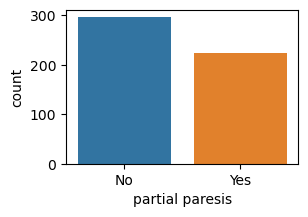

In [46]:
plt.figure(figsize=(3,2))
sns.countplot(x='partial paresis', data=rawDF)

muscle stiffness

<Axes: xlabel='muscle stiffness', ylabel='count'>

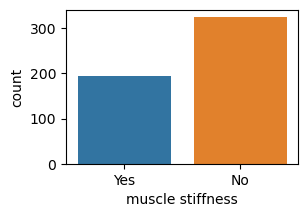

In [47]:
plt.figure(figsize=(3,2))
sns.countplot(x='muscle stiffness', data=rawDF)

Alopecia

<Axes: xlabel='Alopecia', ylabel='count'>

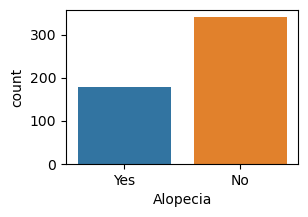

In [48]:
plt.figure(figsize=(3,2))
sns.countplot(x='Alopecia', data=rawDF)

Obesity

<Axes: xlabel='Obesity', ylabel='count'>

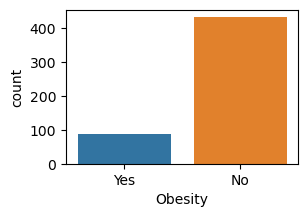

In [49]:
plt.figure(figsize=(3,2))
sns.countplot(x='Obesity', data=rawDF)

class (Diabetes or not)

<Axes: xlabel='class', ylabel='count'>

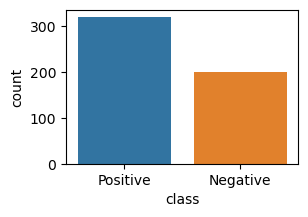

In [50]:
plt.figure(figsize=(3,2))
sns.countplot(x='class', data=rawDF)

4. Encoding Categorical Variables (which is pretty much all of them)

In [51]:
categoricalCols = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 
                  'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 
                  'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'Gender']

categoricalCols

['Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity',
 'Gender']

In [52]:
from sklearn.preprocessing import OneHotEncoder

#splitting target from features
yDF = rawDF["class"].map({'Positive': 1, 'Negative': 0})
xDF = rawDF.drop(columns=["class"])

# instantiate and fit the one hot encoder
encoder = OneHotEncoder(sparse_output=False)
xDF_encoded = encoder.fit_transform(xDF[categoricalCols])
encoderArray = encoder.fit_transform(rawDF[categoricalCols])
colNames = encoder.get_feature_names_out(categoricalCols)
xDF_encoded = pd.DataFrame(xDF_encoded, columns=colNames)

# get the dataframe of the 
oneHotDF = pd.DataFrame(encoderArray, columns=colNames)

#target variable 'class'
oneHotDF['class'] = rawDF['class'].map({'Positive': 1, 'Negative': 0})

oneHotDF.head()

,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,weakness_Yes,Polyphagia_No,Polyphagia_Yes,...,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes,Gender_Female,Gender_Male,class
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1


Machine Learning Models:

Splitting target from features-

In [53]:
pd.DataFrame(yDF)

,class
0,1
1,1
2,1
3,1
4,1
...,...
515,1
516,1
517,1
518,0


Splitting into testing and training sets

In [54]:
from sklearn.model_selection import train_test_split

nonCategoricalColumns = xDF.drop(columns='Age').columns

xTrain, xTest, yTrain, yTest = train_test_split(
    xDF, yDF, 
    test_size=0.2,
    shuffle = True,
    stratify = yDF)

In [55]:
xTrain.shape

(416, 16)

In [56]:
yTrain.shape

(416,)

Scaling age and concatenating it:

In [70]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Age']
categorical_features = [col for col in xTrain.columns if col not in numerical_features]

xScaler = StandardScaler()
xScaler_age = xScaler.fit_transform(xTrain[numerical_features])

scaled_Age_df = pd.DataFrame(xScaler_age, columns=numerical_features)
# train the scaler and apply it to the training set
xDF_Final = pd.concat([xDF_encoded, scaled_Age_df], axis=1)

print(xDF_Final.head())

   Polyuria_No  Polyuria_Yes  Polydipsia_No  Polydipsia_Yes  \
0          1.0           0.0            0.0             1.0   
1          1.0           0.0            1.0             0.0   
2          0.0           1.0            1.0             0.0   
3          1.0           0.0            1.0             0.0   
4          0.0           1.0            0.0             1.0   

   sudden weight loss_No  sudden weight loss_Yes  weakness_No  weakness_Yes  \
0                    1.0                     0.0          0.0           1.0   
1                    1.0                     0.0          0.0           1.0   
2                    1.0                     0.0          0.0           1.0   
3                    0.0                     1.0          0.0           1.0   
4                    0.0                     1.0          0.0           1.0   

   Polyphagia_No  Polyphagia_Yes  ...  partial paresis_Yes  \
0            1.0             0.0  ...                  0.0   
1            1.0      

Finding best hyperparameters/kfold cross validation:

In [58]:
scaled_Age_df.shape

(416, 1)

xtrain = scaled_Age_df

Logistic Regression:

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = [{'penalty':['l1','l2'], 
              'C':[1, 10, 100, 1000]}]
gridSearch = GridSearchCV(estimator = LogisticRegression(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(scaled_Age_df, yTrain) 

logisticParams = gridSearch.best_params_

logisticParams

/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", 

{'C': 1, 'penalty': 'l2'}

Support Vector Machine:

In [60]:
from sklearn.svm import SVC

parameters = {'C':[1,10,100,1000],
              'gamma':[1,0.1,0.001,0.0001], 
              'kernel':['linear','rbf']}
gridSearch = GridSearchCV(estimator = SVC(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(scaled_Age_df, yTrain) 

svmParams = gridSearch.best_params_

svmParams

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

Neural Nets:

In [61]:
from sklearn.neural_network import MLPClassifier

parameters = parameter_space = {
    'max_iter': [1000],
    'hidden_layer_sizes': [(50,50), (50,50,50), (100)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
gridSearch = GridSearchCV(estimator = MLPClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(scaled_Age_df, yTrain) 

mlpParams = gridSearch.best_params_

mlpParams

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': 100,
 'learning_rate': 'constant',
 'max_iter': 1000,
 'solver': 'adam'}

Decision Tree:

In [62]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 10, 20, 30, 40, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [None, 'sqrt', 'log2']}

              
gridSearch = GridSearchCV(estimator = DecisionTreeClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(scaled_Age_df, yTrain) 

treeParams = gridSearch.best_params_

treeParams

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'random'}

K-NN:

In [64]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': [3, 5, 7, 9],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p': [1, 2]}

              
gridSearch = GridSearchCV(estimator = KNeighborsClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(scaled_Age_df, yTrain) 

knn_params = gridSearch.best_params_

knn_params

{'algorithm': 'brute', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

Random Forest:

In [65]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': [50, 100, 200],
                 'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'max_features': ['auto', 'sqrt', 'log2']}

              
gridSearch = GridSearchCV(estimator = RandomForestClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(scaled_Age_df, yTrain) 

forr_params = gridSearch.best_params_

forr_params

/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/User

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

ACTUAL regression scores:

Logistic Regression:

In [72]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

from sklearn.linear_model import LogisticRegression

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(scaled_Age_df, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = scaled_Age_df.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainscScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])
    

    ### model training
    # instantiate the model
    clf = LogisticRegression(**logisticParams)
    # Train the classifier on the training data
    clf.fit(xLocalTrain, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

    ## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)


/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Completed Fold 0
    Accuracy=0.75    Recall=1.0    FScore=0.8571428571428571
Completed Fold 1
    Accuracy=0.6506024096385542    Recall=1.0    FScore=0.7883211678832117
Completed Fold 2
    Accuracy=0.6265060240963856    Recall=1.0    FScore=0.7703703703703704
Completed Fold 3
    Accuracy=0.6024096385542169    Recall=1.0    FScore=0.7518796992481203
Completed Fold 4
    Accuracy=0.5421686746987951    Recall=1.0    FScore=0.703125
Mean accuracy score: 0.6343373493975903
Mean f1 score: 0.774167818928912
Mean precision score: 0.6343373493975903
Mean recall score: 1.0


Decision Tree:

In [84]:
from sklearn.tree import DecisionTreeClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(scaled_Age_df, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = scaled_Age_df.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainscScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])
    

    ### model training
    # instantiate the model
    clf = DecisionTreeClassifier(**treeParams)
    # Train the classifier on the training data
    clf.fit(xLocalTrain, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

    ## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)


Completed Fold 0
    Accuracy=0.75    Recall=1.0    FScore=0.8571428571428571
Completed Fold 1
    Accuracy=0.6506024096385542    Recall=1.0    FScore=0.7883211678832117
Completed Fold 2
    Accuracy=0.6265060240963856    Recall=1.0    FScore=0.7703703703703704
Completed Fold 3
    Accuracy=0.6024096385542169    Recall=1.0    FScore=0.7518796992481203
Completed Fold 4
    Accuracy=0.5421686746987951    Recall=1.0    FScore=0.703125
Mean accuracy score: 0.6343373493975903
Mean f1 score: 0.774167818928912
Mean precision score: 0.6343373493975903
Mean recall score: 1.0


/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Support Vector Machine

In [74]:
from sklearn.svm import SVC

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(scaled_Age_df, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = scaled_Age_df.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainscScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])
    

    ### model training
    # instantiate the model
    clf = SVC(**svmParams)
    # Train the classifier on the training data
    clf.fit(xLocalTrain, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

    ## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.75    Recall=1.0    FScore=0.8571428571428571
Completed Fold 1
    Accuracy=0.6506024096385542    Recall=1.0    FScore=0.7883211678832117
Completed Fold 2
    Accuracy=0.6265060240963856    Recall=1.0    FScore=0.7703703703703704
Completed Fold 3
    Accuracy=0.6024096385542169    Recall=1.0    FScore=0.7518796992481203
Completed Fold 4
    Accuracy=0.5421686746987951    Recall=1.0    FScore=0.703125
Mean accuracy score: 0.6343373493975903
Mean f1 score: 0.774167818928912
Mean precision score: 0.6343373493975903
Mean recall score: 1.0


/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/sean/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Neural Net:

In [91]:
from sklearn.neural_network import MLPClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(scaled_Age_df, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = scaled_Age_df.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = MLPClassifier(**mlpParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

    ## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.75    Recall=1.0    FScore=0.8571428571428571
Completed Fold 1
    Accuracy=0.6506024096385542    Recall=1.0    FScore=0.7883211678832117
Completed Fold 2
    Accuracy=0.6265060240963856    Recall=1.0    FScore=0.7703703703703704
Completed Fold 3
    Accuracy=0.6024096385542169    Recall=1.0    FScore=0.7518796992481203
Completed Fold 4
    Accuracy=0.5421686746987951    Recall=1.0    FScore=0.703125
Mean accuracy score: 0.6343373493975903
Mean f1 score: 0.774167818928912
Mean precision score: 0.6343373493975903
Mean recall score: 1.0


KNN:

In [82]:
from sklearn.neighbors import KNeighborsClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(scaled_Age_df, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = scaled_Age_df.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = KNeighborsClassifier(**knn_params)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

    ## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.75    Recall=1.0    FScore=0.8571428571428571
Completed Fold 1
    Accuracy=0.6506024096385542    Recall=1.0    FScore=0.7883211678832117
Completed Fold 2
    Accuracy=0.6265060240963856    Recall=1.0    FScore=0.7703703703703704
Completed Fold 3
    Accuracy=0.6024096385542169    Recall=1.0    FScore=0.7518796992481203
Completed Fold 4
    Accuracy=0.5421686746987951    Recall=1.0    FScore=0.703125
Mean accuracy score: 0.6343373493975903
Mean f1 score: 0.774167818928912
Mean precision score: 0.6343373493975903
Mean recall score: 1.0


Random Forest Classifier:

In [85]:
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(scaled_Age_df, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = scaled_Age_df.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = RandomForestClassifier(**forr_params)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

    ## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.75    Recall=1.0    FScore=0.8571428571428571
Completed Fold 1
    Accuracy=0.6506024096385542    Recall=1.0    FScore=0.7883211678832117
Completed Fold 2
    Accuracy=0.6265060240963856    Recall=1.0    FScore=0.7703703703703704
Completed Fold 3
    Accuracy=0.6024096385542169    Recall=1.0    FScore=0.7518796992481203
Completed Fold 4
    Accuracy=0.5421686746987951    Recall=1.0    FScore=0.703125
Mean accuracy score: 0.6343373493975903
Mean f1 score: 0.774167818928912
Mean precision score: 0.6343373493975903
Mean recall score: 1.0


Retraining on the best:

In [86]:
### feature scaling
xScaler = StandardScaler()
xColNames = xLocalTrain.columns.values.tolist()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(scaled_Age_df[xColNames])
# apply the scaling to the testing set
xTestScaled = xScaler.transform(xTest[xColNames])

In [87]:
################ 
# Neural Net
################
clf = MLPClassifier(**mlpParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

nnAccuracy = accuracy_score(yTest, preds)
nnFScore = f1_score(yTest, preds)
nnPrecision = precision_score(yTest, preds)
nnRecall = recall_score(yTest, preds)


################ 
# SVM
################

clf = SVC(**svmParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

svmAccuracy = accuracy_score(yTest, preds)
svmFScore = f1_score(yTest, preds)
svmPrecision = precision_score(yTest, preds)
svmRecall = recall_score(yTest, preds)

scoreDict = {"model" : ["Neural Network", "SVM"],
            "accuracy" : [nnAccuracy, svmAccuracy],
            "fScore" : [nnFScore, svmFScore],
            "precision" : [nnPrecision, svmPrecision],
            "recall" : [nnRecall, svmRecall]}

resultsDF = pd.DataFrame.from_dict(scoreDict)

resultsDF

,model,accuracy,fScore,precision,recall
0,Neural Network,0.615385,0.761905,0.615385,1.0
1,SVM,0.615385,0.761905,0.615385,1.0
